In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/509 assessment 2/Q3/D2.csv')

In [3]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
import pydotplus

In [6]:
data.head()

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive
0,male,30_40,174,64,bp,yes,med,white,native,never,3.0132,7.725594,2.0,never,4,1
1,male,30_40,182,118,unknown,yes,med,white,native,never,0.0000,7.725594,3.0,never,4,1
2,male,30_40,184,118,unknown,yes,med,white,native,never,0.0000,7.725594,3.0,never,4,1
3,female,70_80,164,72,unknown,yes,med,white,native,never,14.0000,7.725594,3.0,never,4,1
4,male,30_40,192,92,unknown,yes,med,white,native,never,0.0000,7.725594,1.0,never,4,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6110 non-null   object 
 1   age               6110 non-null   object 
 2   height            6110 non-null   int64  
 3   weight            6110 non-null   int64  
 4   blood_type        6110 non-null   object 
 5   insurance         6110 non-null   object 
 6   income            6110 non-null   object 
 7   race              6110 non-null   object 
 8   immigrant         6110 non-null   object 
 9   smoking           6110 non-null   object 
 10  alcohol           6110 non-null   float64
 11  contacts_count    6110 non-null   float64
 12  house_count       6110 non-null   float64
 13  working           6110 non-null   object 
 14  worried           6110 non-null   int64  
 15  covid19_positive  6110 non-null   int64  
dtypes: float64(3), int64(4), object(9)
memory 

In [ ]:
#contacts_count and house_count needs to be integer numbers

In [ ]:
data['contacts_count'] = data['contacts_count'].astype(int)
data['house_count'] = data['house_count'].astype(int)

In [ ]:
#checking for any negative values in the numerical columns

In [ ]:
data[data['height']<0]

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive


In [ ]:
data[data['weight']<0]

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive


In [ ]:
data[data['alcohol']<0]

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive


In [ ]:
data[data['contacts_count']<0]

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive


In [ ]:
data[data['house_count']<0]

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive


In [ ]:
data[data['worried']<0]

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive


In [ ]:
data[data['covid19_positive']<0]

,gender,age,height,weight,blood_type,insurance,income,race,immigrant,smoking,alcohol,contacts_count,house_count,working,worried,covid19_positive


In [7]:
df = data #making a copy and using df for the time being from here on

In [8]:
df = pd.get_dummies(df)
    
# target/input split
y = df['covid19_positive']
X = df.drop(['covid19_positive'], axis=1)

# setting random state
rs = 10

X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [ ]:
y_train

6028    0
3831    0
400     1
4795    0
1926    0
       ..
4085    0
2573    0
4007    0
4034    0
5514    1
Name: covid19_positive, Length: 4277, dtype: int64

FIRST TREE - not the optimal one

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# print model parameters
print(model.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 10, 'splitter': 'best'}


In [12]:
num_leaves = model.tree_.n_leaves
print("Default tree - number of leaf nodes/rules: ", str(num_leaves))

Default tree - number of leaf nodes/rules:  1005


In [13]:
num_leaves = model.tree_.node_count
print("Default tree - number of leaf nodes/rules: ", str(num_leaves))

Default tree - number of leaf nodes/rules:  2009


In [16]:
print("Default model train accuracy:", model.score(X_train, y_train)) #definitely underfifitting

Default model train accuracy: 1.0


In [18]:
print("Default model test accuracy:", model.score(X_test, y_test))

Default model test accuracy: 0.6601200218221495


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1070
           1       0.59      0.58      0.59       763

    accuracy                           0.66      1833
   macro avg       0.65      0.65      0.65      1833
weighted avg       0.66      0.66      0.66      1833



In [19]:
import numpy as np

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(importances))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
  print(feature_names[i], ':', importances[i])

weight : 0.11062387353686777
height : 0.09887905696911266
income_high : 0.09381629165155812
contacts_count : 0.08748394686406752
house_count : 0.07820143363957127
worried : 0.060891059406188615
alcohol : 0.06014198089019569
blood_type_unknown : 0.023339208770288368
blood_type_op : 0.017786504147024113
insurance_yes : 0.015129837578613081
working_never : 0.014410690088983514
blood_type_ap : 0.01432955907592733
age_20_30 : 0.013977527764659974
working_travel non critical : 0.013957599602552365
age_60_70 : 0.013772710083276159
age_30_40 : 0.013717220135729848
immigrant_native : 0.012498860533319566
working_stopped : 0.01249588968284876
income_med : 0.012191302583019882
age_90_100 : 0.01126842780212238


In [ ]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_viz.png") # saved in the following file - will return True if successful

In [ ]:
print(model.tree_.node_count)

2003


Same non optimal tree, but smaller

In [ ]:
#retrain with a small max_depth limit

model_small = DecisionTreeClassifier(max_depth=3, random_state=rs)
model_small.fit(X_train, y_train)

print("Train accuracy:", model_small.score(X_train, y_train))
print("Test accuracy:", model_small.score(X_test, y_test))

y_pred = model_small.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6883329436520926
Test accuracy: 0.6846699399890889
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1070
           1       0.61      0.69      0.65       763

    accuracy                           0.68      1833
   macro avg       0.68      0.69      0.68      1833
weighted avg       0.69      0.68      0.69      1833



In [ ]:
### Enter your code here
### Solution
importances = model_small.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

income_high : 0.6046801595599428
worried : 0.30472230885345275
weight : 0.035355844269239635
contacts_count : 0.026182030651994766
age_90_100 : 0.020963317067375704
gender_female : 0.008096339597994412
working_travel non critical : 0.0
age_50_60 : 0.0
blood_type_bn : 0.0
blood_type_ap : 0.0
blood_type_an : 0.0
blood_type_abp : 0.0
blood_type_abn : 0.0
age_80_90 : 0.0
age_70_80 : 0.0
age_60_70 : 0.0
age_30_40 : 0.0
age_40_50 : 0.0
blood_type_on : 0.0
age_20_30 : 0.0


In [ ]:
dotfile = StringIO()
export_graphviz(model_small, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_viz2.png") # saved in the following file - will return True if successful

In [ ]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save) #same function as below but gives out colored tree

In [ ]:
tree_graph_to_png(model_small, feature_names=X.columns, 
                 png_file_to_save='dt.png')

TRYING GRIDSEARCH CV and get an optimal tree instead of the normal general one

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 51),
          'min_samples_leaf': range(0, 50, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.00342393, 0.0028085 , 0.00285649, 0.00276062, 0.00305512,
       0.002877  , 0.00274191, 0.00282106, 0.00281866, 0.00435748,
       0.00431266, 0.00432448, 0.00461011, 0.0045362 , 0.00475776,
       0.00451555, 0.00458548, 0.00478587, 0.00594184, 0.0062551 ,
       0.00646541, 0.00657218, 0.00660546, 0.00689566, 0.00614271,
       0.00622144, 0.00622454, 0.00773921, 0.00854611, 0.00828433,
       0.00820129, 0.00748994, 0.00744419, 0.00784938, 0.00784397,
       0.00748067, 0.00923784, 0.00921419, 0.01009014, 0.00936534,
       0.00879514, 0.00906622, 0.00940952, 0.00893996, 0.00865407,
       0.01055341, 0.01052043, 0.01101134, 0.01041973, 0.01021059,
       0.01066678, 0.01026103, 0.01221781, 0.01355264, 0.01636384,
       0.01565175, 0.01596775, 0.0153285 , 0.01559725, 0.01479044,
       0.01501992, 0.01401074, 0.01435339, 0.01782141, 0.01729462,
       0.01814768, 0.01719241, 0.01295669, 0.01192889, 0.01234684,
       0.01155424, 0.01135652, 0.01553712, 0

In [ ]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  900


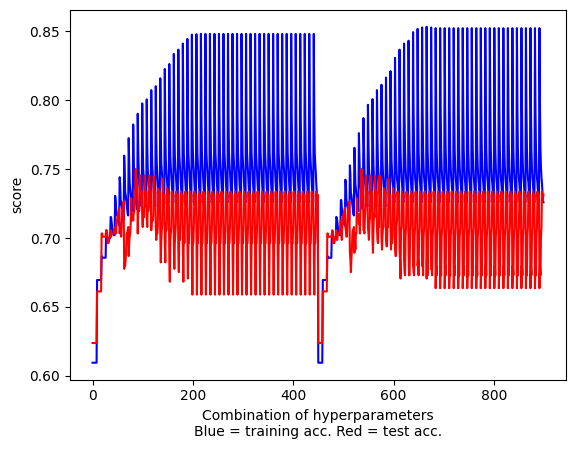

In [ ]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

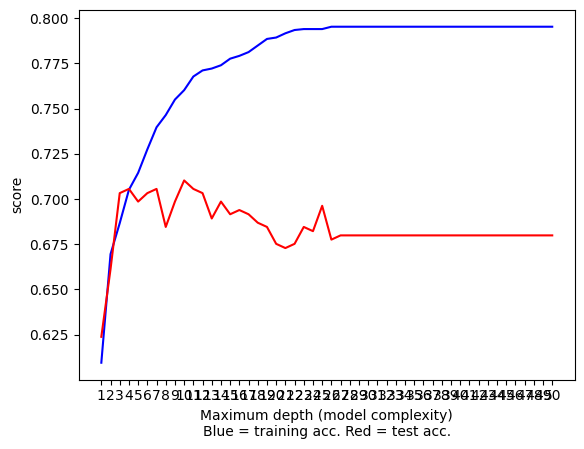

In [ ]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

In [ ]:
#for split0 the max depth is ??

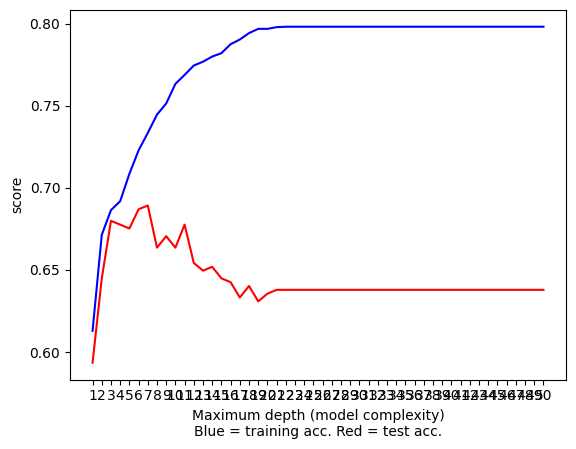

In [ ]:
### Enter your code here for split1
### Solution
train_result = result_set['split1_train_score']
test_result = result_set['split1_test_score']
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

In [ ]:
#best max depth is probably ? for split1

In [ ]:
print(cv_1.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 25}


In [ ]:
#gridsearchCV says best max depth is 10. so let's find the mean_score across all aplits and see if this is true

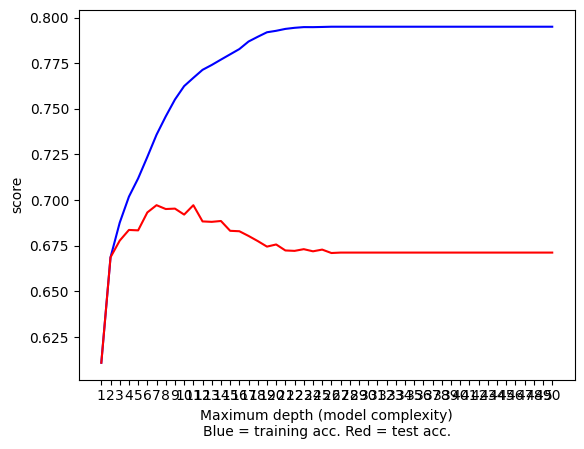

In [ ]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [ ]:
# it is around 10, but i can't see the numbers properly and i also do not care

In [ ]:
cv_1.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, random_state=10)

In [ ]:
cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.7411737198971241
Test accuracy: 0.696126568466994


In [ ]:
importances = cv_1.best_estimator_.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(importances))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

income_high : 0.3404498810310947
worried : 0.17399765976146608
weight : 0.08734420268843264
contacts_count : 0.06015946789789758
height : 0.049790532574871406
insurance_no : 0.0389369725662005
house_count : 0.027963204653377295
age_60_70 : 0.025170101355872727
income_med : 0.023372719595252573
immigrant_native : 0.021262697809625468
alcohol : 0.020907121007141264
age_70_80 : 0.020754016018793467
race_white : 0.018104735236127753
age_30_40 : 0.01295709063175838
working_never : 0.011142080490036413
blood_type_unknown : 0.009409124693731515
smoking_never : 0.009249548391069224
blood_type_op : 0.008809218302849134
working_stopped : 0.007365685964575746
age_40_50 : 0.006742634787106731


In [ ]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

dotfile = StringIO()
export_graphviz(cv_1, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("optimal_tree.png") # saved in the following file - will return True if successful

AttributeError: ignored

In [ ]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save) #same function as below but gives out colored tree

In [ ]:
tree_graph_to_png(cv_1, feature_names=X.columns, 
                 png_file_to_save='dt.png')

AttributeError: ignored

In [ ]:
import numpy as np
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
  # grab feature importances from the model
  importances = dm_model.feature_importances_
  # sort them out in descending order
  indices = np.argsort(np.absolute(importances))
  indices = np.flip(indices, axis=0)
  # limit to 20 features, you can leave this out to print out everything
  indices = indices[:n_to_display]
  for i in indices:
    print(feature_names[i], ':', importances[i])
def visualize_decision_tree(dm_model, feature_names, save_name):
  dotfile = StringIO()
  export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
  graph = pydot.graph_from_dot_data(dotfile.getvalue())
  graph[0].write_png(save_name) # saved in the following file
  # do the feature importance and visualization analysis on GridSearchCV

#from dm_tools import analyse_feature_importance, visualize_decision_tree
analyse_feature_importance(cv_1.best_estimator_, X.columns, 20)
visualize_decision_tree(cv_1.best_estimator_, X.columns, "optimal_tree.png")


income_high : 0.3404498810310947
worried : 0.17399765976146608
weight : 0.08734420268843264
contacts_count : 0.06015946789789758
height : 0.049790532574871406
insurance_no : 0.0389369725662005
house_count : 0.027963204653377295
age_60_70 : 0.025170101355872727
income_med : 0.023372719595252573
immigrant_native : 0.021262697809625468
alcohol : 0.020907121007141264
age_70_80 : 0.020754016018793467
race_white : 0.018104735236127753
age_30_40 : 0.01295709063175838
working_never : 0.011142080490036413
blood_type_unknown : 0.009409124693731515
smoking_never : 0.009249548391069224
blood_type_op : 0.008809218302849134
working_stopped : 0.007365685964575746
age_40_50 : 0.006742634787106731


In [ ]:
print(cv_1.tree_.node_count)

AttributeError: ignored

In [ ]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.28751311647429173 	 0.7124868835257083 	 1
0.4230769230769231 	 0.5769230769230769 	 0
1.0 	 0.0 	 0
1.0 	 0.0 	 0
0.28751311647429173 	 0.7124868835257083 	 1
0.6923076923076923 	 0.3076923076923077 	 1
0.28751311647429173 	 0.7124868835257083 	 1
0.28751311647429173 	 0.7124868835257083 	 1
0.9743589743589743 	 0.02564102564102564 	 0
0.7307692307692307 	 0.2692307692307692 	 0
0.7407407407407407 	 0.25925925925925924 	 0
0.28751311647429173 	 0.7124868835257083 	 1
0.28751311647429173 	 0.7124868835257083 	 1
0.44 	 0.56 	 0
0.7619047619047619 	 0.23809523809523808 	 0
0.28751311647429173 	 0.7124868835257083 	 1
0.8666666666666667 	 0.13333333333333333 	 0
0.28751311647429173 	 0.7124868835257083 	 1
0.64 	 0.36 	 0
0.7358490566037735 	 0.2641509433962264 	 0


In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_small = model_small.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)
roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_small = roc_auc_score(y_test, y_pred_proba_dt_small[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])
print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_small:", roc_index_dt_small)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.6490886931811223
ROC index on test for DT_small: 0.7103673399394912
ROC index on test for DT_optimal: 0.7461195967712301


In [ ]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_small, tpr_dt_small, thresholds_dt_small = roc_curve(y_test, y_pred_proba_dt_small[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

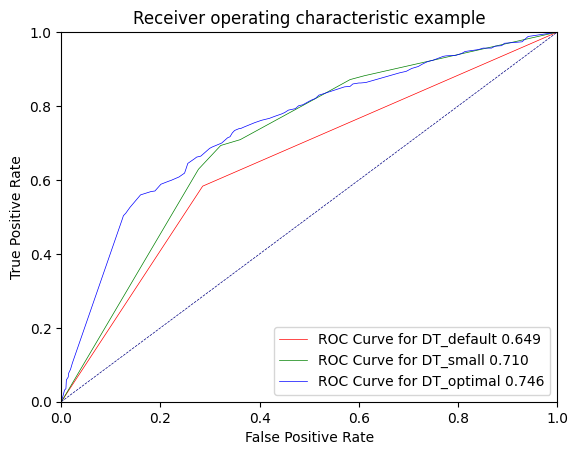

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_small, tpr_dt_small, label='ROC Curve for DT_small {:.3f}'.format(roc_index_dt_small), color='green', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pip install pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
import pickle
dt_best = cv_1
with open('/content/drive/MyDrive/509 assessment 2/Q3/DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)